# Radioactive Decay with Extra Quantum Randomness

Due Wed March 18 late (as usual, actually early Thursday morning)

The goals of this assignment are two-fold

1. Learn how to run a Monte Carlo simulation

2. Fit data, understand uncertainties in the fitted parameters.
----

#### a)

Write Python code to record random radioactive decays as a function of time.

We saw earlier that the decay rate (number of decays per unit time) $D = dN/dt = -k N$ where $k$ is a constant (the decay rate (for a specific radioactive element) with units 1 over time).

The solution to this differential equation is 
$N = N_0 \exp(-k t)$
where $N_0$ is the initial number of atoms. That means the solution for average number of decays per _unit time_ is
$D = k N_0 \exp(-k t) = D_0 \exp(-k t)$

But decay is a quantum process so essentially random. In a given time interval, if, for example, 1 decay is expected _on average_ , then one might see 0, 1, 2 .. etc.

The probability that determines this is the [Possion distribution](https://en.wikipedia.org/wiki/Poisson_distribution). Given an _expected average_ $\mu$, the probability of observing $n$ counts is 
$$
P(n)= \frac{\mu^n e^{-\mu}}{n!}
$$
which yields
$$
\begin{align}
P(0) & = \exp(-\mu) \\
P(1) & = \mu \exp(-\mu) \\
P(2) & = \frac{\mu^2}{2} \exp(-\mu) \\
\ldots
\end{align}
$$

----


##### Implementation

Divide time up into a very short time interval $\Delta t$. During that interval the mean number of decays is $\mu = -k N \Delta t$. But since it is _probabilistic_ , the actual number $i$ (0, 1, 2 ...) is given by the Poisson distribution with mean $\mu$. 

However, if $\mu$ is low enough ($<<1$) there are only two possibilities: 0 or 1, with the probability of 2 being very small (since it goes as $\mu^2$).

You can use the formula with $N_0$ and $t$ to calculate this probability. [In _principle_, the decay rate depends on N, and N does not drop smoothly but rather in steps due to the random nature of previous decays. But _in practice_ this is a small effect and so the $N$ that goes into the probability can be replaced with $N_0 \exp(-k t)$]

To be specific
* Start with $N_0 = 1000$, $k$ = 1./s and $\Delta t = 0.00001$ s. [$\Delta t$ is chosen so that there is a only a $0.01$ probability of a decay within the time interval at the beginning ($t=0$)]. 
* Follow the decays for 2 seconds. 
* Plot the number of decays within intervals of $\Delta t = 0.00001$ as a function of time. Since the only option is 0 or 1, the plot will look like vertical bars that will thin out.



In [85]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def decay(N0,k,t,dt):

    N=N0
    time=0.
    D=0.
    x=[]
    y=[]
    while time<t:
        u=k*N*dt
        pdecay = u*np.exp(-u)
        rand=np.random.uniform(0.,1.)
        if rand<pdecay:
            N=N-1.
            D=1.
        time+=dt
        x.append(time)
        y.append(D)
        D=0.
    return (np.array(x),np.array(y))

(x,y)=decay(1000.,1.,2.,0.00001)
plt.bar(x,y,width=0.0005)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4fec67be18> (for post_execute):


KeyboardInterrupt: 

#### b)

We would like to now use this data to measure the decay constant, $k$, in the simulation.

How to fit this data? (One way is via direct maximum likelihood: but that's too advanced for this assignment.) The way other is to "rebin" the data into larger time intervals so that there is a substantial number of counts per time interval or "bin". With the larger number of counts, the _central limit theorem_ applies, and so the uncertainties in the counts in a bin are given by the normal or Gaussian distribution and are equal to the square root of the counts.

#### Implementation

Add up the decays within larger intervals of $\Delta T = 0.1$ seconds (this is called "rebinning").  Think of a way to do this effieciently.

Now plot the number of decays $n_i$ in each bin of time $\Delta T$ with error bars, where the error bar is the uncertainty $\sqrt{n_i}$, as a function of time.

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95]
[87. 75. 74. 62. 79. 63. 55. 44. 47. 32. 31. 38. 28. 23. 28. 25. 25. 17.
 15. 19.]
[9.327379053088816, 8.660254037844387, 8.602325267042627, 7.874007874011811, 8.888194417315589, 7.937253933193772, 7.416198487095663, 6.6332495807108, 6.855654600401044, 5.656854249492381, 5.5677643628300215, 6.164414002968976, 5.291502622129181, 4.795831523312719, 5.291502622129181, 5.0, 5.0, 4.123105625617661, 3.872983346207417, 4.358898943540674]


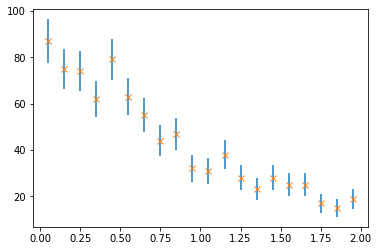

In [73]:
"""
N0=1000.
k=1.
dt=0.00001
dtbin=0.1
N=N0
t=0.
tbin=0.
D=0.
x=[]
y=[]
while t<2.:
    u=k*N*dt
    pdecay = u*np.exp(-u)
    rand=np.random.uniform(0.,1.)
    if rand<pdecay:
        N=N-1.
        D=1.
    t+=dt
    x.append(t)
    y.append(D)
    D=0.

x=np.array(x)
y=np.array(y)
"""
def decayhist(data,dtbin,T):
    histdata=[]
    for k in np.arange(dtbin/2.,T+(dtbin/2.),dtbin):
        for i in np.arange(int((k-dtbin/2.)/dt),int((k+dtbin/2.)/dt),1):
            if y[i]>0.5:
                histdata.append(k)
    data=plt.hist(histdata,np.arange(0.,T+dtbin,dtbin))
    plt.close()
    ydata=data[0]
    xdata=data[1]+np.full(data[1].size,dtbin/2.)
    return(xdata[0:(xdata.size-1)],ydata)
(xdata,ydata)=decayhist(y,0.1,2.)
errors=[]
for i in range(ydata.size):
    e=np.sqrt(ydata[i])
    errors.append(e)
plt.errorbar(xdata,ydata,errors, fmt='none')
plt.plot(xdata,ydata,"x")
print(xdata)
print(ydata)
print(errors)

#### c)

Now pretend that you did not know what the constants were. 

Write code to fit this decay data as a function of time and determine the two unknown constants $D_0$ and $k$, and the uncertainties on each.

Note that if you take the (natural) log of the counts the problem becomes a straight line fitting problem, and the constants are related to the desired $D_0$ and $k$. _(Hint: use [Error Propagation](http://mathworld.wolfram.com/ErrorPropagation.html) to get, for each large $\Delta T$ bin, the uncertainty in the natural **log of the counts** from the counts and their uncertainty.)_


You can use ``scipy`` to help with the fitting. I recommend ``scipy.optimize.leastsq`` or ``numpy.polyfit``. In either case you will have to extract the uncertainties on the parameters from the _covariance matrix_. The uncertainties on the parameters are the square root of the diagonal elements of the covariance matrix.

Plot the decay counts as a function of time with error bars, and also plot the best fit curve over the data. Print as a string the best fit decay constant value and its uncertainty on the plot itself.

Text(1.25, 60, 'k=1.05228 +/- 0.07167')

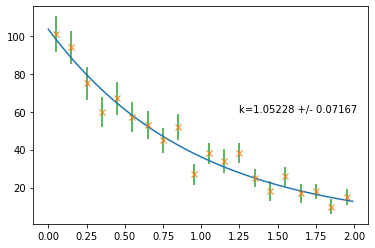

In [79]:
import scipy.optimize as opt
def fitlogdata(xin,yin):
    lnD=np.log(yin)
    def linearfunc(x,m,c):
        return m*x+c
    (popt,pcov)=np.polyfit(xin,lnD,1,cov=True)
    k=-popt[0]
    D0=np.exp(popt[1])
    return (k,D0,np.sqrt(pcov[0,0]),np.sqrt(pcov[1,1]))
(k,D0,dk,dD0)=fitlogdata(xdata,ydata)
xfit=np.arange(0.,2.,0.01)
yfit=D0*np.exp(-k*xfit)
plt.plot(xfit,yfit)
plt.plot(xdata,ydata, "x")
plt.errorbar(xdata, ydata, errors, fmt="none")
plt.annotate("k="+str(round(k,5))+" +/- "+str(round(dk,5)), (1.25,60))


#### d) Monte Carlo Error Estimate

For this part, the idea is to compare simulations of the fitted values and their measured uncertainties, with true values and the uncertainties calculated in the classical way.

##### Implementation

Repeat the previous parts (a)-(c) (without the plots) $N_{sim} = 1000$ times. (You wrote the above as functions or classes, so that it's easy to make a loop out of them, right?)

a. Set $N_0 = 1000$.

b. After each of simulation, save the fitted values and the uncertainties of $D_0$ and $k$ in arrays, so that the end you will have 1000 values of each.

c. For the recovered decay constant, $k$, print out the mean of the all the $N_{sim}=1000$ fitted values and the error _in this mean_ along with the true input value.

Also print out the standard deviations of the fitted values, and the mean of the individual uncertainties on the fits.

d. Try again running steps b and c again, but now with $N_0 = 10000$. You will have to adjust $\Delta t$ so that it is even smaller than before to keep the probability of decay per $\Delta t$ interval $\ll 1$.

Running with even smaller timesteps will slow down your code so it is important that it is efficient.

In [97]:
D0array=[]
karray=[]
dkarray=[]
dD0array=[]
for i in range(5):
    (x,y)=decay(1000.,1.,2.,0.00001)
    (xdata,ydata)=decayhist(y,0.1,2.)
    (k,D0,dk,dD0)=fitlogdata(xdata,ydata)
    D0array.append(D0)
    karray.append(k)
    dkarray.append(dk)
    dD0array.append(dD0)
D0array=np.array(D0array)
karray=np.array(karray)
dkarray=np.array(dkarray)
dD0array=np.array(dD0array)
meank=np.average(karray)
sk=np.std(karray)
meandk=np.average(dkarray)
sdk=np.std(dkarray)
meanD0=np.average(D0array)
sD0=np.std(D0array)
meandD0=np.average(dD0array)
sdD0=np.std(dD0array)

print("k= "+str(meank)+" dk= "+str(meandk)+" sk= " +str(sk))
print("D0= "+str(meanD0)+" dD0= "+str(meandD0)+" sD0= " +str(sD0))

D0array=[]
karray=[]
dkarray=[]
dD0array=[]
for i in range(5):
    (x,y)=decay(10000.,1.,2.,0.000001)
    (xdata,ydata)=decayhist(y,0.1,2.)
    (k,D0,dk,dD0)=fitlogdata(xdata,ydata)
    D0array.append(D0)
    karray.append(k)
    dkarray.append(dk)
    dD0array.append(dD0)
D0array=np.array(D0array)
karray=np.array(karray)
dkarray=np.array(dkarray)
dD0array=np.array(dD0array)
meank=np.average(karray)
sk=np.std(karray)
meandk=np.average(dkarray)
sdk=np.std(dkarray)
meanD0=np.average(D0array)
sD0=np.std(D0array)
meandD0=np.average(dD0array)
sdD0=np.std(dD0array)


print("k= "+str(meank)+" dk= "+str(meandk)+" sk= " +str(sk))
print("D0= "+str(meanD0)+" dD0= "+str(meandD0)+" sD0= " +str(sD0))


    

k= 0.969251235638102 dk= 0.06885357140457234 sk= 0.046573891529523986
D0= 96.28017994338516 dD0= 0.07948040669439702 sD0= 4.3558570351995165
k= 0.12396985648971506 dk= 0.0329985224321099 sk= 0.020247312846859405
D0= 100.78850683246647 dD0= 0.03809150244084667 sD0= 2.5565388218777985


---
#### Question(s):

For the two cases, are the recovered values of $k$ consistent the input? In other words, is our fitting method _biased_ ? Of course they won't agree perfectly (due to the random nature of the simulations), but does the mean of the recovered values agree _within (say twice) the error bars_ with the input value? If not, why not? Discuss both cases $N_0 = 1000$ and $N_0 = 10000$. Does one of them agree better? If so, why?

For $N_0 = 1000$, compare the measured standard deviation of the 1000 fitted values of $k$ with the mean of the individual uncertainties on the fits. Do they agree?

For the case $N_0 = 10000$, why is the measured standard deviation of the 10000 fitted values of $k$ lower than it was for $N_0 = 1000$?

YOUR ANSWER HERE